## 06 Using specialized packages to grab data
Previously we saw how 3rd party packages vastly increase what Python can do quickly and fairly easily. Here we see that this applies to downloading data as well; someone has written a Python package to download Census data quite easily.

First we need to install the packages, and then we'll use them to grab some data. One note, however, is that to use these packages you need to sign up for a [free] Census API key. You can do this here: https://api.census.gov/data/key_signup.html

Documentation for these packages is here: 
https://pypi.python.org/pypi/census
https://github.com/datamade/census

We'll discuss APIs, such as ths Census API next...

In [ ]:
#pip install Census

In [8]:
#pip install plotnine

Note: you may need to restart the kernel to use updated packages.


In [1]:
#Import the 'census' package; install if needed
from census import Census

In [9]:
#And finally, import pandas
import pandas as pd
from plotnine import *

In [10]:
# Add your census key here:
key = None

In [11]:
# Create the connection to the Census API
c = Census(key, year=2015)

In [12]:
variables = ('NAME', 'B19001_001E')
params = {'for':'tract:*', 'in':'state:24'} #FIPS 24 is Maryland
response = c.acs5.get(variables, params)
response = pd.DataFrame(response)
response.dtypes

NAME            object
B19001_001E    float64
state           object
county          object
tract           object
dtype: object

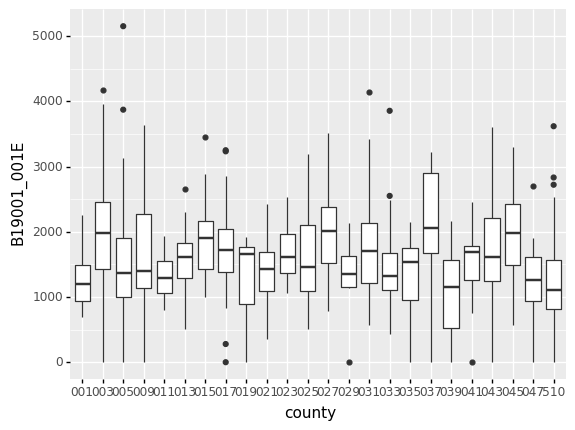

<ggplot: (120094404637)>

In [13]:
#Convert variable to numeric value
response[variables[1]] = pd.to_numeric(response[variables[1]])
thePlot = ggplot(data=response)
thePlot + geom_boxplot(aes(x = 'county', y = variables[1]))